In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

In [2]:
import numpy as np

indexes = np.random.randint(70000, size=7000)

xtrain = mnist.data[indexes][:4900]
xtest = mnist.data[indexes][4900:]

ytrain = mnist.target[indexes][:4900]
ytest = mnist.target[indexes][4900:]

# xtrain = mnist.data[:49000]
# xtest = mnist.data[49000:]

# ytrain = mnist.target[:49000]
# ytest = mnist.target[49000:]

In [3]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(50))

In [4]:
clf.fit(xtrain, ytrain)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=50, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [5]:
import matplotlib.pyplot as plt

itest = 19

#images = xtest.reshape((-1, 28, 28))
#plt.imshow(images[itest],cmap=plt.cm.gray_r,interpolation="nearest")
#plt.show()

found_classes = clf.predict(xtest)

for itest in range(1,20):
    #itest = 4
    
    res =  " OK" if ytest[itest] == found_classes[itest] else ""

    print("Classe : " + ytest[itest] + " / Attendu " + found_classes[itest] + res)



Classe : 1 / Attendu 1 OK
Classe : 1 / Attendu 1 OK
Classe : 1 / Attendu 1 OK
Classe : 5 / Attendu 5 OK
Classe : 4 / Attendu 4 OK
Classe : 0 / Attendu 0 OK
Classe : 0 / Attendu 0 OK
Classe : 8 / Attendu 8 OK
Classe : 5 / Attendu 5 OK
Classe : 3 / Attendu 3 OK
Classe : 0 / Attendu 0 OK
Classe : 0 / Attendu 0 OK
Classe : 1 / Attendu 1 OK
Classe : 6 / Attendu 6 OK
Classe : 0 / Attendu 0 OK
Classe : 5 / Attendu 5 OK
Classe : 0 / Attendu 0 OK
Classe : 4 / Attendu 4 OK
Classe : 0 / Attendu 0 OK


In [6]:
from sklearn.metrics import precision_score

print("Score clf : " + str(clf.score(xtest, ytest)))
print("Score micro : " + str(precision_score(ytest, found_classes, average="micro")))
print("Score macro : " + str(precision_score(ytest, found_classes, average="macro")))
print("Score weighted : " + str(precision_score(ytest, found_classes, average="weighted")))

Score clf : 0.8771428571428571
Score micro : 0.8771428571428571
Score macro : 0.8771307539496483
Score weighted : 0.8801303578527536


# Tests de précision
- 2 couches à 50 neurones
- 10 couches à 50 neurones
- 20 couches à 50 neurones
- 50 couches à 50 neurones
- 100 couches à 50 neurones

Puis faire 50 couches avec 60, 59, 58, ... neurones

Puis faire 20 couches avec 60, 57, 54, ... neurones

In [7]:
from sklearn.metrics import recall_score
from sklearn.metrics import zero_one_loss

import time

couche = (50,)
scores_couches_test = []
scores_couches_train = []
rappel_couches_test = []
erreurs = []
time_couches = []

nb_couches = [1, 2, 10, 20, 50, 100]



for i in nb_couches:
    

    clf = MLPClassifier(hidden_layer_sizes=(couche*i))
    start_time = time.process_time()
    clf.fit(xtrain, ytrain)
    time_couches.append(time.process_time() - start_time)
    

    score_test = clf.score(xtest, ytest)
    scores_couches_test.append(score_test)
    
    score_train = clf.score(xtrain, ytrain)
    scores_couches_train.append(score_train)
    
    ypredict = clf.predict(xtest)
    erreurs.append(zero_one_loss(ytest, ypredict))
    
    found_classes = clf.predict(xtest)
    rappel_test = recall_score(ytest, found_classes, average="micro")
    rappel_couches_test.append(rappel_test)
    
    
    print("Couches : " + str(i) + " -> te " + str(score_test))
    print("Couches : " + str(i) + " -> tr " + str(score_train))
    print("Couches : " + str(i) + " -> ra " + str(rappel_test))

    



Couches : 1 -> te 0.8738095238095238
Couches : 1 -> tr 0.9706122448979592
Couches : 1 -> ra 0.8738095238095238
Couches : 2 -> te 0.8538095238095238
Couches : 2 -> tr 0.9997959183673469
Couches : 2 -> ra 0.8538095238095238
Couches : 10 -> te 0.91
Couches : 10 -> tr 0.9895918367346939
Couches : 10 -> ra 0.91
Couches : 20 -> te 0.919047619047619
Couches : 20 -> tr 0.9975510204081632
Couches : 20 -> ra 0.919047619047619
Couches : 50 -> te 0.09571428571428571
Couches : 50 -> tr 0.10857142857142857
Couches : 50 -> ra 0.09571428571428571
Couches : 100 -> te 0.09571428571428571
Couches : 100 -> tr 0.10857142857142857
Couches : 100 -> ra 0.09571428571428571


Text(0.5, 1.0, 'Score pour différents nombre de couches de 50 neurones')

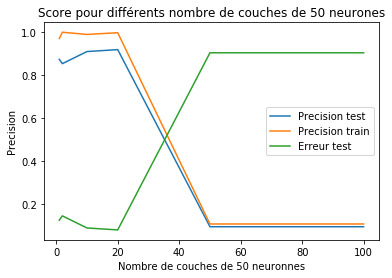

In [8]:
plt.plot([x for x in nb_couches], scores_couches_test)
plt.plot([x for x in nb_couches], scores_couches_train)
plt.plot([x for x in nb_couches], erreurs)


plt.legend(['Precision test', 'Precision train', "Erreur test"], loc='best')
plt.xlabel("Nombre de couches de 50 neuronnes")
plt.ylabel("Precision")
plt.title("Score pour différents nombre de couches de 50 neurones")

Text(0.5, 1.0, "Temps d'entrainement pour différents nombre de couches de 50 neurones")

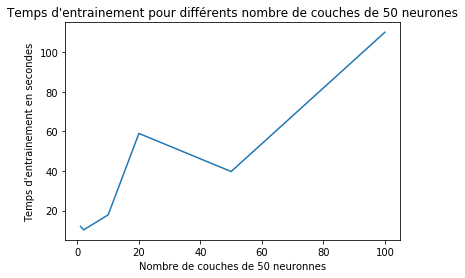

In [9]:
plt.plot([x for x in nb_couches], time_couches)

plt.xlabel("Nombre de couches de 50 neuronnes")
plt.ylabel("Temps d'entrainement en secondes")
plt.title("Temps d'entrainement pour différents nombre de couches de 50 neurones")

On voit sur notre graphique que la précision pour les données d'entrainement diminue également. cela signifie que notre algoritme n'arrive pas à généraliser notre modèle
# Overfitting
L'algorithme est tellement bien entrainé avec toutes les valeurs dont il dispose en train qui fait de mauvaises prédictions. Exemple avec la droite



Calculer la précision pour 50 couches de 60, puis 59, puis 58, ... neurones.

In [10]:
couches = (60,)
for i in range(59 , 10, -1):
    couches = couches + (i,)
    
# print(couches)


clf = MLPClassifier(hidden_layer_sizes=(couches))

start_time = time.process_time()
clf.fit(xtrain, ytrain)
exec_time = time.process_time() - start_time

print ("Exec time : " + str(exec_time))

Exec time : 86.68418277199999


In [11]:
score_test = clf.score(xtest, ytest)
score_train = clf.score(xtrain, ytrain)
print("Calculer la précision pour 50 couches de 60, puis 59, puis 58, ... neurones.")
print("Score test : " + str(score_test))
print("Score train : " + str(score_train))

Calculer la précision pour 50 couches de 60, puis 59, puis 58, ... neurones.
Score test : 0.8528571428571429
Score train : 0.9379591836734694


Calculer la précision pour 20 couches de 60, puis 57, puis 54, ... neurones.

In [12]:
couches = (60,)
for i in range(57 , 0, -3):
    couches = couches + (i,)
    
#print(couches)


clf = MLPClassifier(hidden_layer_sizes=(couches))

start_time = time.process_time()
clf.fit(xtrain, ytrain)
exec_time = time.process_time() - start_time

print ("Exec time : " + str(exec_time))

Exec time : 26.713525618999995


In [13]:
score_test = clf.score(xtest, ytest)
score_train = clf.score(xtrain, ytrain)
print("Calculer la précision pour 20 couches de 60, puis 57, puis 54, ... neurones.")

print("Score test : " + str(score_test))
print("Score train : " + str(score_train))

Calculer la précision pour 20 couches de 60, puis 57, puis 54, ... neurones.
Score test : 0.5147619047619048
Score train : 0.5204081632653061


In [14]:
import time

for count in range(0, 5):
    nb_couches = np.random.randint(1, high=11)

    for i in range(1, nb_couches+1):
        nb_neurones = np.random.randint(10, 311)

        if i == 1:
            couches = (nb_neurones,)
        else:
            couches = couches + (nb_neurones,)


    clf = MLPClassifier(hidden_layer_sizes=(couches))
    start_time = time.process_time()
    clf.fit(xtrain, ytrain)
    exec_time = time.process_time() - start_time


    score_test = clf.score(xtest, ytest)
    score_train = clf.score(xtrain, ytrain)

    print(str(couches))
    print("\t" + "-> " + str(exec_time) + " sec")
    print("\t" + "-> Score test : " + str(score_test))
    print("\t" + "-> Score train : " + str(score_train))

(124, 104, 45, 229, 263, 189, 58, 161, 226, 301)
	-> 61.52815952899999 sec
	-> Score test : 0.9319047619047619
	-> Score train : 0.9975510204081632
(43, 255, 224, 35, 156, 236, 283, 22, 156, 145)
	-> 69.87944588000005 sec
	-> Score test : 0.920952380952381
	-> Score train : 0.9920408163265306
(13, 35, 194, 158, 36, 58, 103, 136, 72, 286)
	-> 31.32146752099993 sec
	-> Score test : 0.8980952380952381
	-> Score train : 0.9861224489795918
(256, 115, 150, 263, 112, 44, 130, 219)
	-> 62.84529782799996 sec
	-> Score test : 0.9476190476190476
	-> Score train : 1.0
(184, 166, 174, 84, 246, 118, 232)
	-> 24.336892765000016 sec
	-> Score test : 0.9257142857142857
	-> Score train : 0.996734693877551


# Différents algorithmes

Couches : 1 -> 0.1957142857142857
Couches : 1 -> 0.2042857142857143
Couches : 2 -> 0.8638095238095238
Couches : 2 -> 0.9508163265306122
Couches : 10 -> 0.9223809523809524
Couches : 10 -> 1.0
Couches : 20 -> 0.7785714285714286
Couches : 20 -> 0.7875510204081633
Couches : 50 -> 0.09571428571428571
Couches : 50 -> 0.10857142857142857
Couches : 100 -> 0.09571428571428571
Couches : 100 -> 0.10857142857142857


Text(0.5, 1.0, 'Algorithme L-FBGS : Score pour différents nombre de couches de 50 neurones')

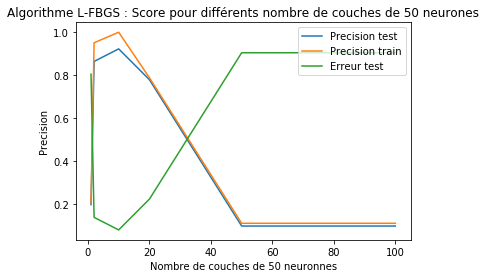

In [15]:
couche = (50,)
scores_couches_test = []
scores_couches_train = []
times_lbfgs = []
erreurs = []

nb_couches = [1, 2, 10, 20, 50, 100]

for i in nb_couches:
    clf = MLPClassifier(hidden_layer_sizes=(couche*i), solver='lbfgs')
    
    start_time = time.process_time()
    clf.fit(xtrain, ytrain)
    exec_time = time.process_time() - start_time
    times_lbfgs.append(exec_time)
    
    score_test = clf.score(xtest, ytest)
    scores_couches_test.append(score_test)
    
    score_train = clf.score(xtrain, ytrain)
    scores_couches_train.append(score_train)
    
    ypredict = clf.predict(xtest)
    erreurs.append(zero_one_loss(ytest, ypredict))
    
    print("Couches : " + str(i) + " -> " + str(score_test))
    print("Couches : " + str(i) + " -> " + str(score_train))
    
plt.plot([x for x in nb_couches], scores_couches_test)
plt.plot([x for x in nb_couches], scores_couches_train)
plt.plot([x for x in nb_couches], erreurs)

plt.legend(['Precision test', 'Precision train', "Erreur test"], loc='upper right')
plt.xlabel("Nombre de couches de 50 neuronnes")
plt.ylabel("Precision")
plt.title("Algorithme L-FBGS : Score pour différents nombre de couches de 50 neurones")

/usr/local/insa/anaconda/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Couches : 1 -> 0.6585714285714286
Couches : 1 -> 0.7083673469387755


/usr/local/insa/anaconda/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Couches : 2 -> 0.56
Couches : 2 -> 0.6338775510204082
Couches : 10 -> 0.8980952380952381
Couches : 10 -> 1.0
Couches : 20 -> 0.8285714285714286
Couches : 20 -> 0.9028571428571428
Couches : 50 -> 0.09571428571428571
Couches : 50 -> 0.10857142857142857
Couches : 100 -> 0.09571428571428571
Couches : 100 -> 0.10857142857142857


Text(0.5, 1.0, 'Algorithme SGD : Score pour différents nombre de couches de 50 neurones')

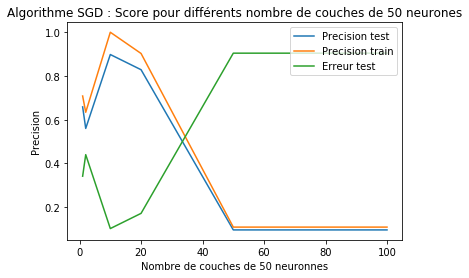

In [16]:
couche = (50,)
scores_couches_test = []
scores_couches_train = []
times_sgd = []
erreurs = []

nb_couches = [1, 2, 10, 20, 50, 100]

for i in nb_couches:
    clf = MLPClassifier(hidden_layer_sizes=(couche*i), solver='sgd')

    start_time = time.process_time()
    clf.fit(xtrain, ytrain)
    exec_time = time.process_time() - start_time
    times_sgd.append(exec_time)
    
    score_test = clf.score(xtest, ytest)
    scores_couches_test.append(score_test)
    
    score_train = clf.score(xtrain, ytrain)
    scores_couches_train.append(score_train)
    
    ypredict = clf.predict(xtest)
    erreurs.append(zero_one_loss(ytest, ypredict))
    
    print("Couches : " + str(i) + " -> " + str(score_test))
    print("Couches : " + str(i) + " -> " + str(score_train))
    
plt.plot([x for x in nb_couches], scores_couches_test)
plt.plot([x for x in nb_couches], scores_couches_train)
plt.plot([x for x in nb_couches], erreurs)


plt.legend(['Precision test', 'Precision train', "Erreur test"], loc='upper right')
plt.xlabel("Nombre de couches de 50 neuronnes")
plt.ylabel("Precision")
plt.title("Algorithme SGD : Score pour différents nombre de couches de 50 neurones")

Couches : 1 -> 0.8795238095238095
Couches : 1 -> 0.9761224489795919
Couches : 2 -> 0.8704761904761905
Couches : 2 -> 0.9785714285714285
Couches : 10 -> 0.9152380952380952
Couches : 10 -> 1.0
Couches : 20 -> 0.920952380952381
Couches : 20 -> 0.9916326530612245
Couches : 50 -> 0.6904761904761905
Couches : 50 -> 0.72
Couches : 100 -> 0.09571428571428571
Couches : 100 -> 0.10857142857142857


Text(0.5, 1.0, 'Algorithme ADAM : Score pour différents nombre de couches de 50 neurones')

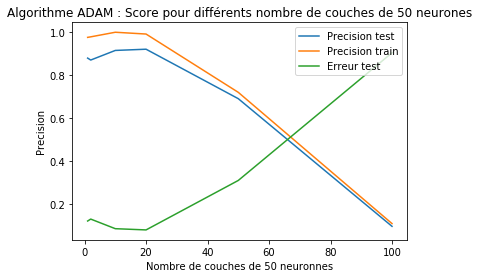

In [17]:
couche = (50,)
scores_couches_test = []
scores_couches_train = []
times_adam = []
erreurs = []


nb_couches = [1, 2, 10, 20, 50, 100]

for i in nb_couches:
    clf = MLPClassifier(hidden_layer_sizes=(couche*i), solver='adam')
    
    start_time = time.process_time()
    clf.fit(xtrain, ytrain)
    exec_time = time.process_time() - start_time
    times_adam.append(exec_time)

    score_test = clf.score(xtest, ytest)
    scores_couches_test.append(score_test)
    
    score_train = clf.score(xtrain, ytrain)
    scores_couches_train.append(score_train)
    
    ypredict = clf.predict(xtest)
    erreurs.append(zero_one_loss(ytest, ypredict))
    
    print("Couches : " + str(i) + " -> " + str(score_test))
    print("Couches : " + str(i) + " -> " + str(score_train))
    
plt.plot([x for x in nb_couches], scores_couches_test)
plt.plot([x for x in nb_couches], scores_couches_train)
plt.plot([x for x in nb_couches], erreurs)

plt.legend(['Precision test', 'Precision train', "Erreur test"], loc='upper right')
plt.xlabel("Nombre de couches de 50 neuronnes")
plt.ylabel("Precision")
plt.title("Algorithme ADAM : Score pour différents nombre de couches de 50 neurones")

Text(0.5, 1.0, "Temps d'exécution pour différents solver et différentes couches intermédiaires")

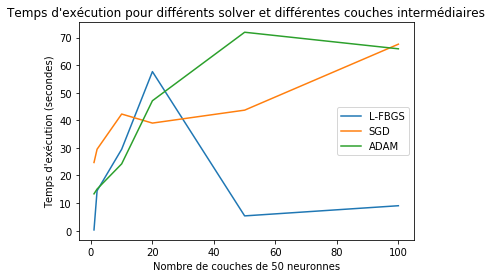

In [18]:
plt.plot([x for x in nb_couches], times_lbfgs)
plt.plot([x for x in nb_couches], times_sgd)
plt.plot([x for x in nb_couches], times_adam)

plt.legend(['L-FBGS', 'SGD', 'ADAM'], loc='best')
plt.xlabel("Nombre de couches de 50 neuronnes")
plt.ylabel("Temps d'exécution (secondes)")
plt.title("Temps d'exécution pour différents solver et différentes couches intermédiaires")

# Différentes activations

Pour des raisons de visibilité, les courbes d'erreurs ne sont pas affichées sur les graphiques ci-dessous


Couches : 1 -> 0.84
Couches : 1 -> 0.9414285714285714
Couches : 2 -> 0.8652380952380953
Couches : 2 -> 0.9740816326530612
Couches : 10 -> 0.8671428571428571
Couches : 10 -> 0.970204081632653
Couches : 20 -> 0.8738095238095238
Couches : 20 -> 0.9693877551020408
Couches : 50 -> 0.8676190476190476
Couches : 50 -> 0.9614285714285714
Couches : 100 -> 0.8571428571428571
Couches : 100 -> 0.923265306122449


Text(0.5, 1.0, 'Activation IDENTITY : Score pour différents nombre de couches de 50 neurones')

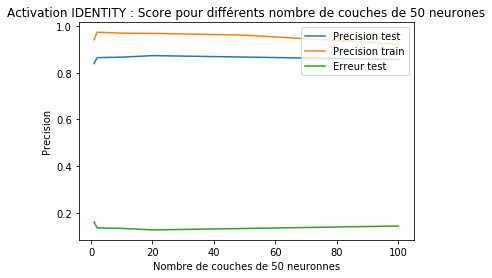

In [19]:
couche = (50,)
scores_couches_test = []
scores_couches_train = []
times_identity = []
erreurs = []

nb_couches = [1, 2, 10, 20, 50, 100]

for i in nb_couches:
    clf = MLPClassifier(hidden_layer_sizes=(couche*i), activation='identity')
    start_time = time.process_time()
    clf.fit(xtrain, ytrain)
    exec_time = time.process_time() - start_time
    times_identity.append(exec_time)

    score_test = clf.score(xtest, ytest)
    scores_couches_test.append(score_test)
    
    score_train = clf.score(xtrain, ytrain)
    scores_couches_train.append(score_train)
    
    ypredict = clf.predict(xtest)
    erreurs.append(zero_one_loss(ytest, ypredict))
    
    print("Couches : " + str(i) + " -> " + str(score_test))
    print("Couches : " + str(i) + " -> " + str(score_train))
    
plt.plot([x for x in nb_couches], scores_couches_test)
plt.plot([x for x in nb_couches], scores_couches_train)
plt.plot([x for x in nb_couches], erreurs)


plt.legend(['Precision test', 'Precision train', "Erreur test"], loc='upper right')
plt.xlabel("Nombre de couches de 50 neuronnes")
plt.ylabel("Precision")
plt.title("Activation IDENTITY : Score pour différents nombre de couches de 50 neurones")

Couches : 1 -> 0.9180952380952381
Couches : 1 -> 0.9759183673469388
Couches : 2 -> 0.909047619047619
Couches : 2 -> 0.956530612244898
Couches : 10 -> 0.09571428571428571
Couches : 10 -> 0.10857142857142857
Couches : 20 -> 0.09571428571428571
Couches : 20 -> 0.10857142857142857
Couches : 50 -> 0.09571428571428571
Couches : 50 -> 0.10857142857142857
Couches : 100 -> 0.09571428571428571
Couches : 100 -> 0.10857142857142857


Text(0.5, 1.0, 'Activation LOGISTIC : Score pour différents nombre de couches de 50 neurones')

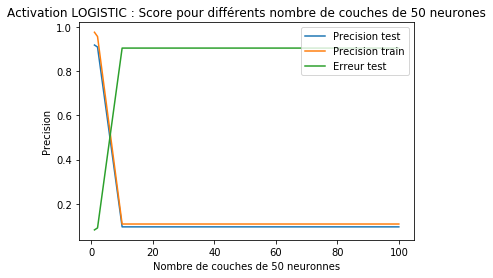

In [20]:
couche = (50,)
scores_couches_test = []
scores_couches_train = []
times_logistic = []
erreurs = []

nb_couches = [1, 2, 10, 20, 50, 100]

for i in nb_couches:
    clf = MLPClassifier(hidden_layer_sizes=(couche*i), activation='logistic')

    start_time = time.process_time()
    clf.fit(xtrain, ytrain)
    exec_time = time.process_time() - start_time
    times_logistic.append(exec_time)
    
    
    score_test = clf.score(xtest, ytest)
    scores_couches_test.append(score_test)
    
    score_train = clf.score(xtrain, ytrain)
    scores_couches_train.append(score_train)
    
    ypredict = clf.predict(xtest)
    erreurs.append(zero_one_loss(ytest, ypredict))
    
    print("Couches : " + str(i) + " -> " + str(score_test))
    print("Couches : " + str(i) + " -> " + str(score_train))
    
plt.plot([x for x in nb_couches], scores_couches_test)
plt.plot([x for x in nb_couches], scores_couches_train)
plt.plot([x for x in nb_couches], erreurs)


plt.legend(['Precision test', 'Precision train', 'Erreur test'], loc='upper right')
plt.xlabel("Nombre de couches de 50 neuronnes")
plt.ylabel("Precision")
plt.title("Activation LOGISTIC : Score pour différents nombre de couches de 50 neurones")

Couches : 1 -> 0.8828571428571429
Couches : 1 -> 0.9146938775510204
Couches : 2 -> 0.8928571428571429
Couches : 2 -> 0.9246938775510204
Couches : 10 -> 0.8895238095238095
Couches : 10 -> 0.9238775510204081
Couches : 20 -> 0.8842857142857142
Couches : 20 -> 0.9181632653061225
Couches : 50 -> 0.09142857142857143
Couches : 50 -> 0.10020408163265306
Couches : 100 -> 0.09571428571428571
Couches : 100 -> 0.10857142857142857


Text(0.5, 1.0, 'Activation TANH : Score pour différents nombre de couches de 50 neurones')

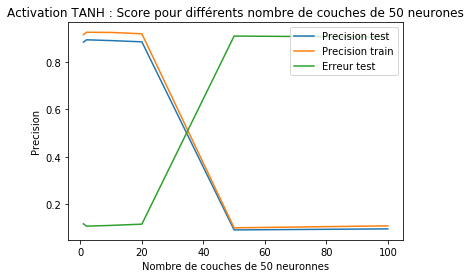

In [21]:
couche = (50,)
scores_couches_test = []
scores_couches_train = []
times_tanh = []
erreurs = []


nb_couches = [1, 2, 10, 20, 50, 100]

for i in nb_couches:
    clf = MLPClassifier(hidden_layer_sizes=(couche*i), activation='tanh')
    
    start_time = time.process_time()
    clf.fit(xtrain, ytrain)
    exec_time = time.process_time() - start_time
    times_tanh.append(exec_time)
    

    score_test = clf.score(xtest, ytest)
    scores_couches_test.append(score_test)
    
    score_train = clf.score(xtrain, ytrain)
    scores_couches_train.append(score_train)
    
    ypredict = clf.predict(xtest)
    erreurs.append(zero_one_loss(ytest, ypredict))
    
    print("Couches : " + str(i) + " -> " + str(score_test))
    print("Couches : " + str(i) + " -> " + str(score_train))
    
plt.plot([x for x in nb_couches], scores_couches_test)
plt.plot([x for x in nb_couches], scores_couches_train)
plt.plot([x for x in nb_couches], erreurs)

plt.legend(['Precision test', 'Precision train', "Erreur test"], loc='upper right')
plt.xlabel("Nombre de couches de 50 neuronnes")
plt.ylabel("Precision")
plt.title("Activation TANH : Score pour différents nombre de couches de 50 neurones")

Couches : 1 -> 0.8652380952380953
Couches : 1 -> 1.0
Couches : 2 -> 0.8666666666666667
Couches : 2 -> 1.0
Couches : 10 -> 0.9104761904761904
Couches : 10 -> 0.9936734693877551
Couches : 20 -> 0.9185714285714286
Couches : 20 -> 0.996938775510204
Couches : 50 -> 0.09571428571428571
Couches : 50 -> 0.10857142857142857
Couches : 100 -> 0.1
Couches : 100 -> 0.10530612244897959


Text(0.5, 1.0, 'Activation RELU : Score pour différents nombre de couches de 50 neurones')

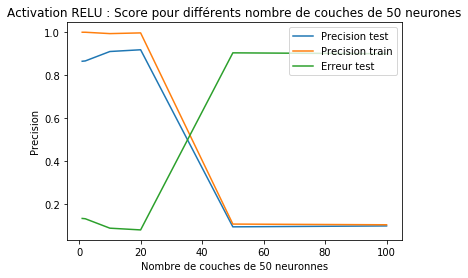

In [22]:
couche = (50,)
scores_couches_test = []
scores_couches_train = []
times_relu = []
erreurs = []

nb_couches = [1, 2, 10, 20, 50, 100]

for i in nb_couches:
    clf = MLPClassifier(hidden_layer_sizes=(couche*i), activation='relu')

    start_time = time.process_time()
    clf.fit(xtrain, ytrain)
    exec_time = time.process_time() - start_time
    times_relu.append(exec_time)
    
    score_test = clf.score(xtest, ytest)
    scores_couches_test.append(score_test)
    
    score_train = clf.score(xtrain, ytrain)
    scores_couches_train.append(score_train)
    
    ypredict = clf.predict(xtest)
    erreurs.append(zero_one_loss(ytest, ypredict))
    
    print("Couches : " + str(i) + " -> " + str(score_test))
    print("Couches : " + str(i) + " -> " + str(score_train))
    
plt.plot([x for x in nb_couches], scores_couches_test)
plt.plot([x for x in nb_couches], scores_couches_train)
plt.plot([x for x in nb_couches], erreurs)

plt.legend(['Precision test', 'Precision train', "Erreur test"], loc='upper right')
plt.xlabel("Nombre de couches de 50 neuronnes")
plt.ylabel("Precision")
plt.title("Activation RELU : Score pour différents nombre de couches de 50 neurones")

Text(0.5, 1.0, "Temps d'exécution pour différentes fonction d'activation et différents couches intermédiaires")

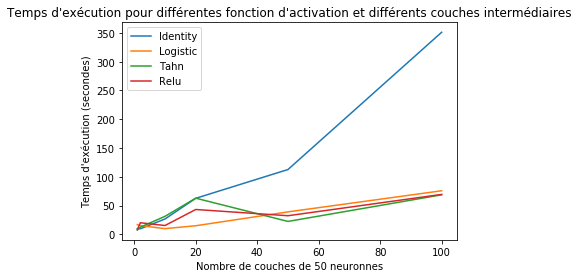

In [23]:
plt.plot([x for x in nb_couches], times_identity)
plt.plot([x for x in nb_couches], times_logistic)
plt.plot([x for x in nb_couches], times_tanh)
plt.plot([x for x in nb_couches], times_relu)

plt.legend(['Identity', 'Logistic', 'Tahn', 'Relu'], loc='best')
plt.xlabel("Nombre de couches de 50 neuronnes")
plt.ylabel("Temps d'exécution (secondes)")
plt.title("Temps d'exécution pour différentes fonction d'activation et différents couches intermédiaires")

# Différents alphas

In [28]:
couche = (50,)

scores_test = []
scores_train = []
times_alphas = []
erreurs_alphas = []

nb_couches = [1, 2, 10, 20, 50, 100]
alphas = [0.0001, 0.001, 0.01, 0.1, 1]

for alpha in alphas:
    times = []
    scores_couches_test = []
    scores_couches_train = []
    erreurs = []
    

    for i in nb_couches:
        clf = MLPClassifier(hidden_layer_sizes=(couche*i), alpha=alpha)
    
        start_time = time.process_time()
        clf.fit(xtrain, ytrain)
        exec_time = time.process_time() - start_time
        times.append(exec_time)
        
        
        score_test = clf.score(xtest, ytest)
        scores_couches_test.append(score_test)

        score_train = clf.score(xtrain, ytrain)
        scores_couches_train.append(score_train)
        
        ypredict = clf.predict(xtest)
        erreurs.append(zero_one_loss(ytest, ypredict))

        print("Couches : " + str(i) + " -> " + str(score_test))
        print("Couches : " + str(i) + " -> " + str(score_train))

    times_alphas.append(times)
    scores_test.append(scores_couches_test)
    scores_train.append(scores_couches_train)
    erreurs_alphas.append(erreurs)

Couches : 1 -> 0.8580952380952381
Couches : 1 -> 0.9822448979591837
Couches : 2 -> 0.8476190476190476
Couches : 2 -> 1.0
Couches : 10 -> 0.9176190476190477
Couches : 10 -> 1.0
Couches : 20 -> 0.9271428571428572
Couches : 20 -> 0.9965306122448979
Couches : 50 -> 0.589047619047619
Couches : 50 -> 0.6246938775510205
Couches : 100 -> 0.09571428571428571
Couches : 100 -> 0.10857142857142857
Couches : 1 -> 0.8728571428571429
Couches : 1 -> 0.9820408163265306
Couches : 2 -> 0.8528571428571429
Couches : 2 -> 1.0
Couches : 10 -> 0.920952380952381
Couches : 10 -> 1.0
Couches : 20 -> 0.9247619047619048
Couches : 20 -> 0.9936734693877551
Couches : 50 -> 0.09571428571428571
Couches : 50 -> 0.10857142857142857
Couches : 100 -> 0.09571428571428571
Couches : 100 -> 0.10857142857142857
Couches : 1 -> 0.8790476190476191
Couches : 1 -> 0.9622448979591837
Couches : 2 -> 0.8438095238095238
Couches : 2 -> 1.0
Couches : 10 -> 0.9147619047619048
Couches : 10 -> 0.9875510204081632
Couches : 20 -> 0.92619047619

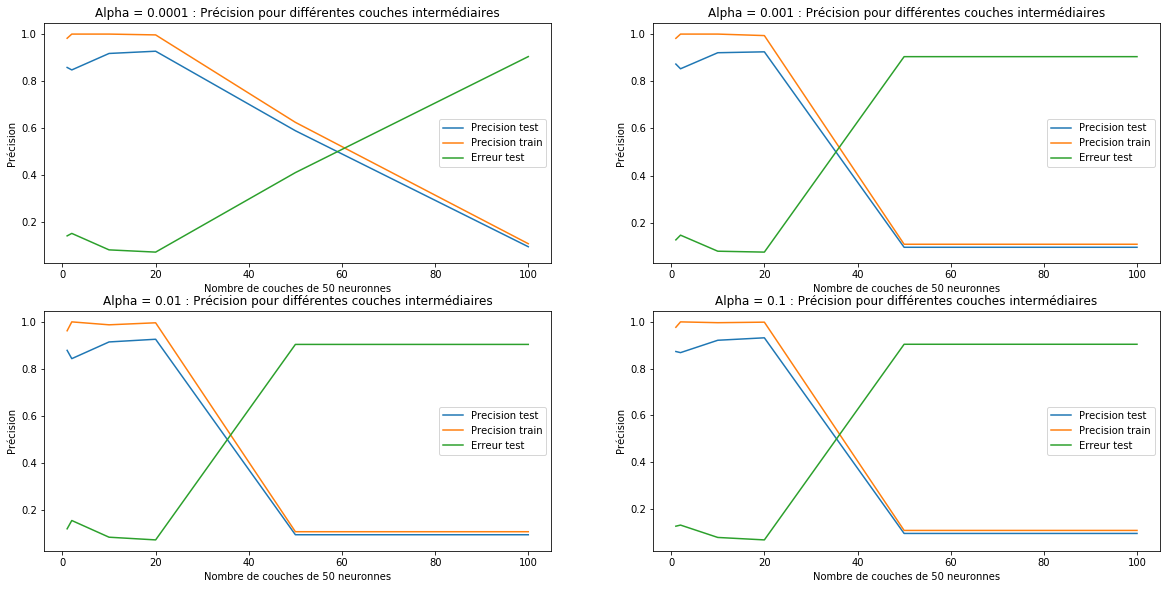

In [32]:
plt.figure(figsize=(20, 15))

i = 0
for alpha in alphas:
    if i < 4:
        plt.subplot(3, 2, i+1)
        plt.plot([x for x in nb_couches], scores_test[i])
        plt.plot([x for x in nb_couches], scores_train[i])
        plt.plot([x for x in nb_couches], erreurs_alphas[i])
        plt.legend(['Precision test', 'Precision train', "Erreur test"], loc='best')
        plt.xlabel("Nombre de couches de 50 neuronnes")
        plt.ylabel("Précision")
        plt.title("Alpha = " + str(alpha) + " : Précision pour différentes couches intermédiaires")
        i = i + 1

    

Text(0.5, 1.0, "Alpha = 1 : Temps d'entrainement")

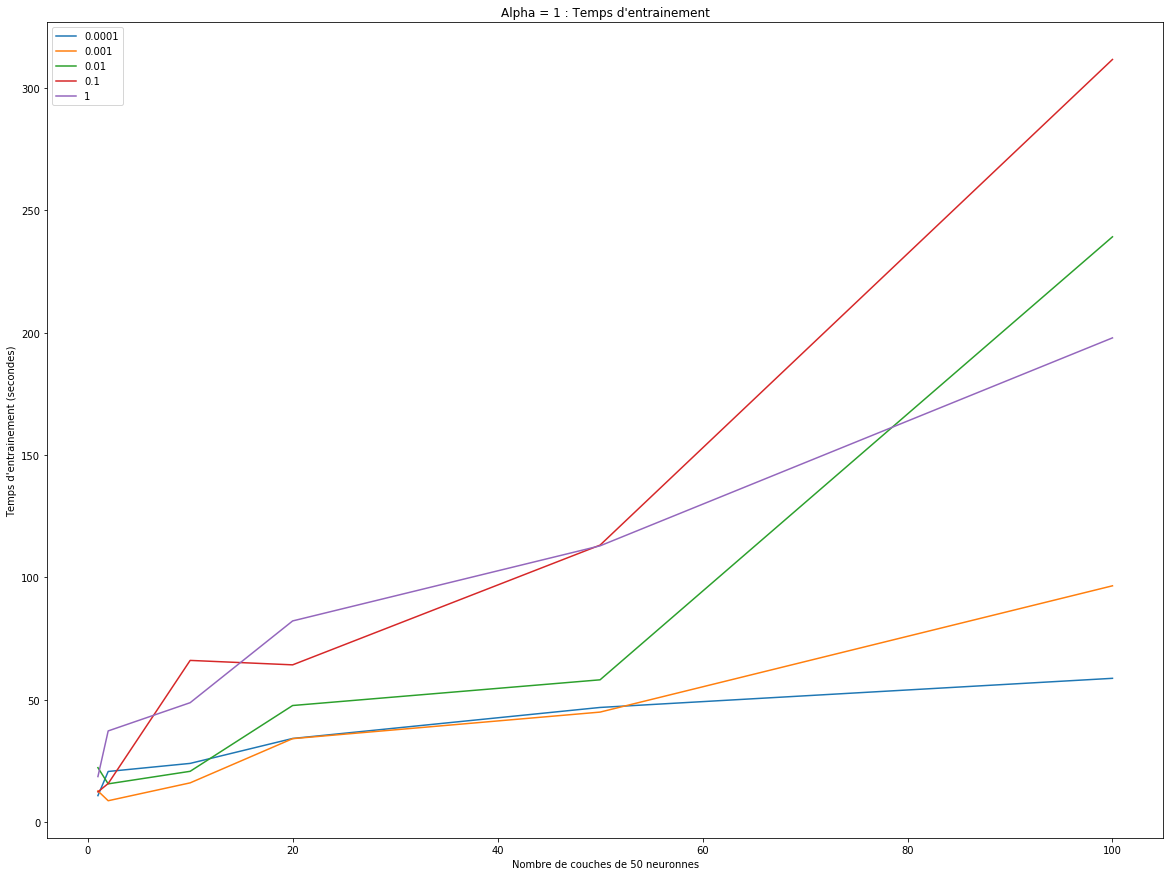

In [30]:
plt.figure(figsize=(20, 15))

i = 0
for alpha in alphas:
    plt.plot([x for x in nb_couches], times_alphas[i])
    i = i + 1
    
plt.legend([a for a in alphas], loc='best')
plt.xlabel("Nombre de couches de 50 neuronnes")
plt.ylabel("Temps d'entrainement (secondes)")
plt.title("Alpha = " + str(alpha) + " : Temps d'entrainement")